<a href="https://colab.research.google.com/github/vik-ahlawat/Data_Science-/blob/main/Lecture_4_LinAlg_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CME 193 - Lec 4: Linear Algebra with Numpy

Today, we'll cover some more features of numpy.

- Random numbers and histograms
- Linear Algebra Method walkthrough
- Principle Component Analysis


If you were not familar with Linear Algebra concept such as dot product, eigen decomposition, and PCA, I highly recommend studying them using some visual aids resource like '3Blue1Brown' or 'StatQuest', which are youtube channels that explains math&stats concept using extremely helpful visualizations.  
[Dot Product](https://www.youtube.com/watch?v=LyGKycYT2v0&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=10)  
[Eigen Decomposition](https://www.youtube.com/watch?v=PFDu9oVAE-g&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=15)  
[PCA main idea](https://www.youtube.com/watch?v=HMOI_lkzW08)  
[PCA step by step](https://www.youtube.com/watch?v=FgakZw6K1QQ)


HINT: use `?` to check the documentation of the function

# Review


## Random numbers

We'll start with
```python
import numpy as np
import numpy.random as rng
```
`numpy` is the *package*.  `random` is a *module* in the package.

In [ ]:
import numpy as np
import numpy.random as rng  # random number generator

You can find a full list of functions in [the documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

* `rng.rand(d0,d1,...,dn)`, Random values in a given shape
* `rng.randn(d0, d1, ...,dn)`, Random standard normal
* `rng.randint(lo, hi, size)`, Random integers `[lo, hi)`
* `rng.choice(a, size, replace, p)`, Sample from a
* `rng.shuffle(a)`, Permutation (in-place)
* `rng.permutation(a)`, Permutation (new array)
* Also, have parameterized distributions: `beta`, `binomial`, `chisquare`, `exponential`, `dirichlet`, `gamma`, `laplace`, `lognormal`, `pareto`, `poisson`, `power`...

In [ ]:
# Try out some examples

In [ ]:
rng.choice(np.array([0,2,4,6]), 2, replace=False)

array([0, 4])

## Histograms

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x1 = rng.normal(5, 3, 1000)

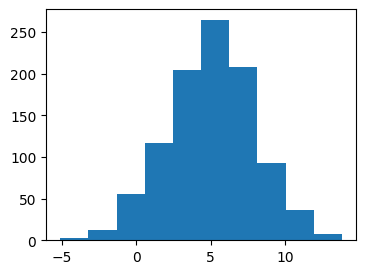

In [ ]:
plt.figure(figsize=(4, 3))
plt.hist(x1)

plt.show()

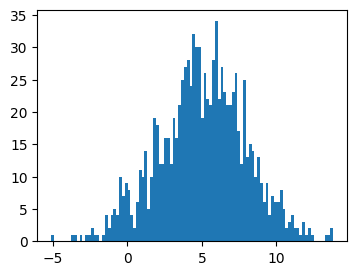

In [ ]:
plt.figure(figsize=(4, 3))
plt.hist(x1, bins=100)

plt.show()

In [ ]:
x2 = rng.normal(1, 1, 1000)

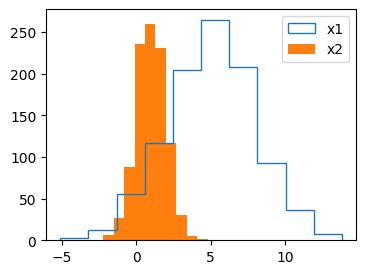

In [ ]:
# plot1
plt.figure(figsize=(4, 3))

b = plt.hist(x1, histtype="step", label='x1')
a = plt.hist(x2, histtype="bar", label='x2')

plt.legend()
plt.show()

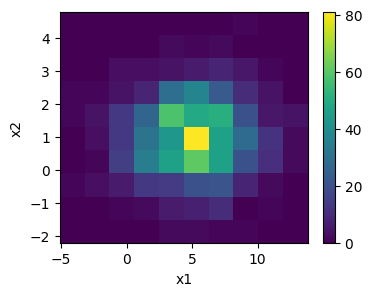

In [ ]:
plt.figure(figsize=(4, 3))

plt.hist2d(x1, x2)

plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()

plt.show()

# bucketized the 2d space into blocks
# and you count the number of occurance in that block

# Linear Algebra in NumPy

In [ ]:
import numpy.linalg as la

See [the documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html) for more.

* `la.qr`, Computes the QR decomposition
* `la.cholesky`, Computes the Cholesky decomposition
* `la.inv(A)`, Inverse
* `la.solve(A,b)`, Solves $Ax = b$ for $A$ full rank
* `la.lstsq(A,b)`, Solves $\arg\min_x \|Ax-b\|_2$.  $\|y_h-y_t\|_2$
* `la.eig(A)`, Eigenvalue decomposition
* `la.eigh(A)`, Eigenvalue decomposition for
symmetric or hermitian
* `la.eigvals(A)`, Computes eigenvalues.
* `la.svd(A, full)`, Singular value decomposition
* `la.pinv(A)`, Computes pseudo-inverse of A

### la.svd

In [ ]:
help(la.svd)
# svd(A) = U@np.diag(S)@V.T

Help on _ArrayFunctionDispatcher in module numpy.linalg:

svd(a, full_matrices=True, compute_uv=True, hermitian=False)
    Singular Value Decomposition.
    
    When `a` is a 2D array, and ``full_matrices=False``, then it is
    factorized as ``u @ np.diag(s) @ vh = (u * s) @ vh``, where
    `u` and the Hermitian transpose of `vh` are 2D arrays with
    orthonormal columns and `s` is a 1D array of `a`'s singular
    values. When `a` is higher-dimensional, SVD is applied in
    stacked mode as explained below.
    
    Parameters
    ----------
    a : (..., M, N) array_like
        A real or complex array with ``a.ndim >= 2``.
    full_matrices : bool, optional
        If True (default), `u` and `vh` have the shapes ``(..., M, M)`` and
        ``(..., N, N)``, respectively.  Otherwise, the shapes are
        ``(..., M, K)`` and ``(..., K, N)``, respectively, where
        ``K = min(M, N)``.
    compute_uv : bool, optional
        Whether or not to compute `u` and `vh` in addition to `

In [ ]:
# example of SVD
A = np.random.normal(0, 1, (3, 3))
A

array([[-1.56976526,  0.02026904,  0.06024464],
       [ 0.66819378,  1.40054994,  0.22233198],
       [ 0.27639073, -0.2642282 , -1.21331157]])

In [ ]:
U, S, Vt = la.svd(A)
print("A  = \n", A)
print("U = \n", U)
print("S = \n", np.diag(S))
print("V = \n", Vt.T)

A  = 
 [[-1.56976526  0.02026904  0.06024464]
 [ 0.66819378  1.40054994  0.22233198]
 [ 0.27639073 -0.2642282  -1.21331157]]
U = 
 [[-0.71496068 -0.45044593  0.53472394]
 [ 0.69867864 -0.48881464  0.52240635]
 [ 0.02606508  0.7471002   0.6642002 ]]
S = 
 [[1.86308088 0.         0.        ]
 [0.         1.49164821 0.        ]
 [0.         0.         0.92081832]]
V = 
 [[ 0.85684809  0.39349964 -0.33312066]
 [ 0.51374884 -0.59742261  0.61575024]
 [ 0.04328368 -0.69874477 -0.71406041]]


<div>
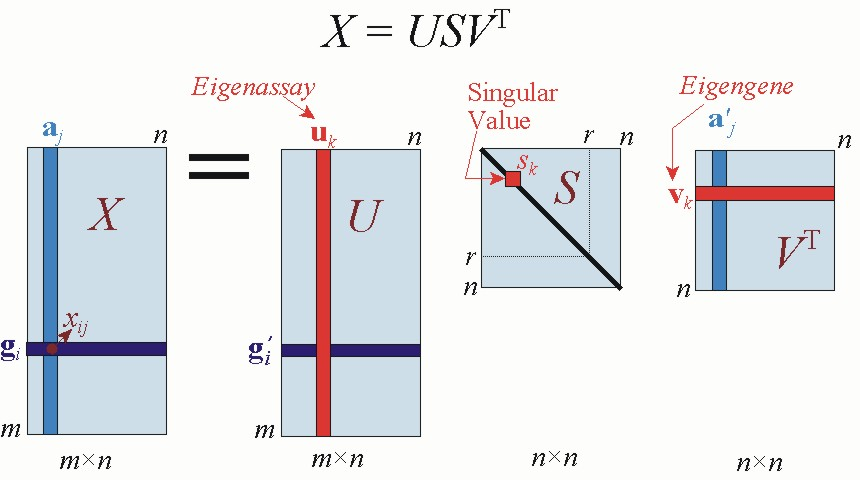
</div>


U and V are unitary arraies: orthogonal and normal  
- The column values are ranked hierarchically from most to least important, based on how much variance they describe in the original matrix.

S is a diagnal matrix:  
- The non-negative, decreasing singular values reflect the relative importance of each corresponding column in U and V to the overall structure of the original matrix.

In [ ]:
U @ U.T
# Expecting an indentity matrix. Rounded Error: float point error double precions -> 10^16

array([[ 1.00000000e+00,  8.29545883e-17,  1.13979638e-16],
       [ 8.29545883e-17,  1.00000000e+00, -4.52424022e-17],
       [ 1.13979638e-16, -4.52424022e-17,  1.00000000e+00]])

In [ ]:
A - (U @ np.diag(S) @ Vt) < 1e-15

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
U @ np.diag(S) @ Vt

array([[-1.56976526,  0.02026904,  0.06024464],
       [ 0.66819378,  1.40054994,  0.22233198],
       [ 0.27639073, -0.2642282 , -1.21331157]])

### la.solve

In [ ]:
?la.solve

In [ ]:
# find x that A@x = b #-> EE364A -> Convex Optimization
A = np.arange(0, 4, 1.0).reshape(2, 2) #square matrix
x_true = np.array([1.0, 2.0])
b = A @ x_true
print("A = \n", A)
print("b = \n", b)

A = 
 [[0. 1.]
 [2. 3.]]
b = 
 [2. 8.]


In [ ]:
# Goal: to solva Ax = b , what is x
x = la.solve(A, b)
print("x = \n", x)

x = 
 [1. 2.]


In [ ]:
x_true

array([1., 2.])

# Gradient Descent (In-lecture)

Generate a 100 by 10 matrix `A = np.random.randn(100,10)` and a vector `b = np.random.rand(100)`. Implement the [Gradient Descent method](https://en.wikipedia.org/wiki/Gradient_descent) to solve the least-squares problem: $$\min_x \|Ax-b\|^2$$ Some pseudocode for this is below:
HINT: `la.norm` would be helpful
```
    input) A: an m x n matrix, b: a m x 1 vector
    outputs) x: n x 1 vector minimizing |A@x-b|_2^2.

    x <- all-zeros vector
    steplength = 0.01

    residual = A@x-b
    while x has not converged(threshold = 0.00001):  
      x = x - steplength*(A.T@residual)
      update residual
```

Compare your solution to numpy's built-in `lstsq` function.

In [ ]:
# YOUR CODE HERE
A = np.random.randn(100, 10)
b = np.random.rand(100)

# initialize x
x = np.zeros(10)
steplength = 0.01

residual = A@x - b
# start algorithm
while la.norm(A.T @ residual) > 1e-5:
  x = x - steplength * (A.T @ residual)
  residual = A@x - b

print(x)

[-0.06584246 -0.00709693 -0.0660598   0.1311779  -0.01138267 -0.00407301
 -0.06330244  0.06536468  0.04551699  0.04947706]


In [ ]:
?la.lstsq

In [ ]:
x_lstsq = la.lstsq(A, b)[0]
print(x_lstsq)

[-0.06584246 -0.00709694 -0.06605981  0.13117792 -0.01138268 -0.00407299
 -0.06330242  0.06536467  0.04551701  0.04947706]


In [ ]:
la.norm((x- x_lstsq))

np.float64(4.542243054227818e-08)

The above code is implementing a **gradient descent** algorithm to solve a system of linear equations of the form $ Ax = b $. The goal is to find a vector `x` that minimizes the difference between $Ax $ and $b$. This is often referred to as solving a least-squares problem, especially when $ A $ is not a square matrix (which it isn't in this case).

1. **Generate Random Matrix and Vector**:
   - `A = np.random.randn(100, 10)` generates a random $ 100 \times 10 $ matrix, `A`, where each element is drawn from a normal distribution.
   - `b = np.random.randn(100)` generates a random vector `b` of length 100.
   - This setup simulates an overdetermined system, meaning there are more equations than unknowns.

2. **Initialize**:
   - `x = np.zeros(10)` initializes a solution vector `x` of length 10, filled with zeros. This is the initial guess for the solution to the equation $ Ax = b $.
   - `steplength = 0.01` sets the step length (learning rate) for the gradient descent. This controls how much `x` is updated in each iteration.

3. **Compute Initial Residual**:
   - `residual = b - A@x` computes the initial residual, which is the difference between the target vector `b` and the current approximation $ Ax $. This measures how far the current guess for `x` is from being the true solution. Initially, since \( x \) is zero, the residual is just \( b \).

4. **Gradient Descent Loop**:
   The loop iteratively updates the solution `x` until convergence:
   - `la.norm(A.T@residual)` computes the norm (magnitude) of the gradient. The gradient is $ A^T \times \text{residual} $, which points in the direction of the steepest descent to minimize the error $ b - A \times x $.
     - **Stopping Condition**: The loop continues as long as this gradient norm is greater than $ 1 \times 10^{-5} $. When it becomes small, the algorithm assumes that it has reached a solution close enough to the real one.
   
   - `x = x + steplength * (A.T@residual)` updates `x` by moving it in the direction of the gradient. The update step is scaled by the `steplength`, which controls how large a step is taken. This is the core of the gradient descent update rule.

   - `residual = b - A@x` updates the residual after the new `x` is computed. This tracks how close the current approximation is to solving the equation.

5. **Result**:
   After the loop finishes, the solution `x` is returned. This is the approximate solution to the system of equations $ Ax = b $, found through gradient descent.


# Power method (In-lecture)

[Power method](https://en.wikipedia.org/wiki/Power_iteration) is an algorithm for finding the largest eigenpair of a matrix.  

Definition: $$Av = \lambda v$$

We'll assume that we're working with symmetric/hermitian matrices for simplicity.  Recall the largest eigenvector of a matrix $A$ solves the variational problem:
$$\max_{\|v\|_2 = 1} v^T A v$$
The eigenvalue is the value $\lambda = v^T A v$. Now,
* Generate a random symmetric matrix (however you like).
* Find the largest eigenpair using the power method
* Compare the answer with what you would get from numpy.linalg.eigh

The power method uses iterated matrix-vector multiplication to find the largest magnitude eigenvalue of $A$.  
HINT: `la.norm` would be helpful
```
    input) A: an n x n symmetric matrix
    outputs) l : the eigenvalue with the largest absolute value
             v: the corresponding eigenvector

    v <- random vector of length n
    while l has not converged(thershold = 1e-5):
        v <- A v
        v <- v / ||v||_2
        l <- v.T@A@v
```

turn the above pseudo-code into a python function that implements power method. How does the result compare to `eigh`?

In [ ]:
# YOUR CODE HERE
A = np.random.normal(size=(5,5))

# initailize evec
v = np.random.normal(size=5)
prev_l = v.T @ A @ v

while True:
  v = A @ v
  v = v / la.norm(v)
  l = v.T @ A @ v

  if abs(prev_l - l) < 1e-5:
    break
  prev_l = l

print(v)
print(l)


[ 0.10645057  0.69503011 -0.10416187  0.20681644 -0.6722936 ]
2.4083497097240305


In [ ]:
v = np.random.rand(5)

l = v @ A @ v

while True:
  v = A @ v
  v = v / la.norm(v)
  l_new = v @ A @ v
  if abs(l - l_new) < 1e-5:
    break
  l = l_new
print(f'The largest eigenvalue is {l}')
print(f'The largest eigenvector is {v}')

In [ ]:
?la.eigh

In [ ]:
x = la.eigh(A)
print(f'largest eval: {x[0][-1]}')

largest eval: 2.4295064397341384


This above code is an implementation of the **Power Iteration** method, which is used to find the **dominant eigenvalue** and its corresponding **eigenvector** of a matrix. Here's a step-by-step breakdown of what's happening:

1. **Import and Seed**: The code imports `numpy.random` and seeds it with 0 using `rng.seed(0)`. Seeding ensures reproducibility of the random numbers generated, so you will always get the same random matrix `A` and vector `v` each time you run the code.

2. **Create a Symmetric Matrix (`A`)**:
    - The code generates a random 5x5 matrix `A` using `rng.randn(5,5)` which creates a matrix with values drawn from a normal distribution (mean 0, variance 1).
    - Symmetry is enforced by adding the matrix to its transpose (`A + A.T`), ensuring that `A` becomes symmetric. Symmetric matrices are useful here because they guarantee real eigenvalues.

3. **Initialize a Random Vector (`v`)**:
    - A random vector `v` of length 5 is initialized using `rng.rand(5)`, where each element is between 0 and 1. This vector is the starting guess for the dominant eigenvector.

4. **Initial Eigenvalue Calculation (`l_prev`)**:
    - The initial value of `l_prev` (an approximation of the dominant eigenvalue) is calculated as \( v^T A v \). This uses the dot product of the vector `v`, the matrix `A`, and `v` again. It essentially projects `v` onto the matrix `A` and gives an estimate for the eigenvalue.

5. **Power Iteration Loop**:
    - The goal is to iteratively refine the estimate of the dominant eigenvalue and its corresponding eigenvector:
      1. **Vector Update**: The vector `v` is updated by multiplying it with the matrix `A` (`v = A @ v`), which shifts `v` closer to the dominant eigenvector.
      2. **Normalization**: The vector `v` is normalized (`v = v / la.norm(v)`) to ensure its magnitude stays the same and doesn't grow uncontrollably.
      3. **Eigenvalue Update**: A new estimate of the eigenvalue `l` is computed as \( v^T A v \), using the updated `v`.
      4. **Convergence Check**: The loop checks if the difference between the new and old eigenvalues (`np.abs(l - l_prev)`) is smaller than a small threshold (`1e-5`). If the change is small enough, the loop breaks, meaning the algorithm has converged to a solution.
      5. **Update `l_prev`**: If the loop hasn’t broken, it sets `l_prev = l` to continue the next iteration with the new estimate.

We now have the groundwork that we will build on in the rest of the class. We'll conclude class with a demonstration of the power of numpy and scipy as a taster for the rest of the class.

# PCA with numpy

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is a very common tool in data science to extract the most relevant features of a dataset. We can implement this in numpy very easily via the SVD. (This demo is taken from the numpy documentation [here](https://numpy.org/doc/1.19/user/tutorial-svd.html)).

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy import misc

img_gray = misc.face(gray=True) / 255

<ipython-input-83-49822cee2249>:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img_gray = misc.face(gray=True) / 255


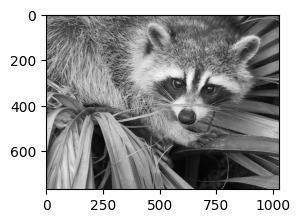

In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(img_gray, cmap="gray")
plt.show()

In [ ]:
img_gray.shape

(768, 1024)

Consider the image above (actually a numpy array). We will attempt to 'compress' it via the SVD.

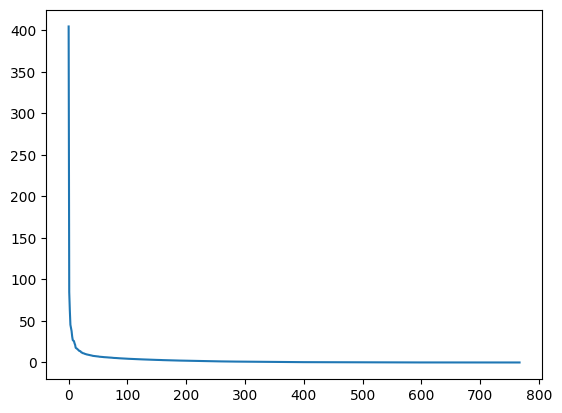

In [ ]:
U, s, Vt = la.svd(img_gray)
S = np.diag(s)
plt.plot(s)

(0.0, 30.0)

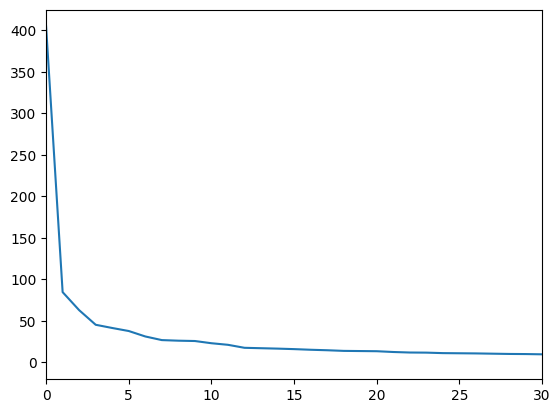

In [ ]:
plt.plot(s)
plt.xlim([0, 30])

The singular values of a matrix represent how 'important' a certain set of vectors is to forming the full matrix. We see here that only a very small number of vectors have large singular value.

In [ ]:
k = 20
compressed = U[:, :k] @ S[:k, :k] @ Vt[:k, :]  # (768,20) (20,20) (20, 1024) -> 768 x 1024
print(compressed.shape)

(768, 1024)


In [ ]:
U.shape

(768, 768)

In [ ]:
img_gray.shape

(768, 1024)

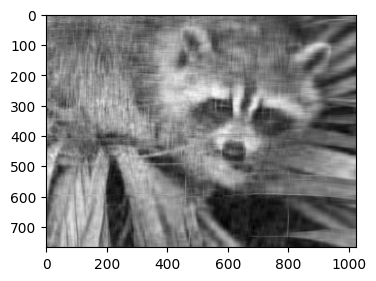

In [ ]:
plt.figure(figsize=(4, 4))
plt.imshow(compressed, cmap="gray")
plt.show()

(768, 1024)


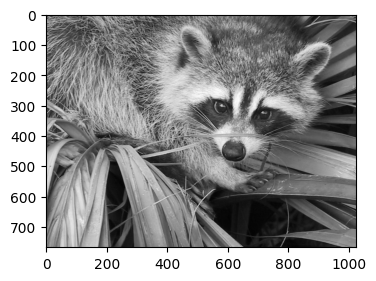

In [ ]:
print(img_gray.shape)
plt.figure(figsize=(4, 4))
plt.imshow(img_gray, cmap="gray")
plt.show()

As we see, with only 20 vectors we are able to construct a (very blurry) representation of the image. In general, singular value decomposition can be very helpful for extracting generalities of a dataset.